In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [88]:
customers = pd.read_csv('/Users/arturarakelan/Downloads/customers.csv')
orders = pd.read_csv('/Users/arturarakelan/Downloads/orders.csv')

In [89]:
customers.head()

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord


In [90]:
orders.head()

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376


In [91]:
pd.DataFrame(orders.groupby('order_date')['id'].count())

,id
order_date,
2014-01-03,1
2014-01-04,1
2014-01-05,1
2014-01-06,3
2014-01-07,1
...,...
2017-12-26,4
2017-12-27,1
2017-12-28,10


In [92]:
orders['year_month'] = pd.to_datetime(orders['order_date']).dt.strftime('%Y-%m')
orders.head()

,id,order_date,ship_mode,customer_id,sales,year_month
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04


In [93]:
cohorts = orders.groupby('customer_id',as_index=False)['year_month'].min()
cohorts.rename(columns = {'year_month':'Cohort'},inplace=True)
cohorts.head()

,customer_id,Cohort
0,AA-10315,2014-03
1,AA-10375,2014-04
2,AA-10480,2014-05
3,AA-10645,2014-06
4,AB-10015,2014-02


In [94]:
df_merged= pd.merge(orders, cohorts , how='left', on='customer_id')
df_merged.head()

,id,order_date,ship_mode,customer_id,sales,year_month,Cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014-04


In [99]:
df_merged_14_15 = df_merged[(df_merged['year_month']>='2014-01') & (df_merged['Cohort']>='2014-01') &
                           (df_merged['year_month']<'2016-01') & (df_merged['Cohort']<'2016-01')]
df_merged_14_15.head()

,id,order_date,ship_mode,customer_id,sales,year_month,Cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014-04


In [100]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [101]:
cohorts_group = df_merged_14_15.groupby(['Cohort', 'year_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Cohort,,,,,,,,,,,,,,,,,,,,,
2014-01,1.0,0.093750,0.062500,0.062500,0.062500,0.125000,0.156250,0.093750,0.218750,0.156250,...,0.093750,0.093750,0.093750,0.125000,0.093750,0.062500,0.125000,0.187500,0.156250,NaN
2014-02,1.0,0.166667,0.083333,0.041667,0.083333,0.083333,0.125000,0.125000,0.166667,0.166667,...,0.083333,0.083333,0.083333,0.083333,0.125000,0.250000,0.083333,0.125000,0.083333,NaN
2014-03,1.0,0.061538,0.030769,0.123077,0.107692,0.107692,0.076923,0.123077,0.092308,0.015385,...,0.092308,0.046154,0.076923,0.076923,0.046154,0.076923,0.138462,0.169231,0.200000,0.184615
2014-04,1.0,0.107143,0.035714,0.071429,0.053571,0.142857,0.107143,0.160714,0.142857,0.017857,...,0.089286,0.142857,0.178571,0.107143,0.089286,0.107143,0.160714,0.053571,0.250000,0.196429
2014-05,1.0,0.089286,0.089286,0.071429,0.178571,0.035714,0.214286,0.178571,0.071429,0.053571,...,0.125000,0.035714,0.089286,0.035714,0.089286,0.142857,0.107143,0.196429,0.142857,NaN
2014-06,1.0,0.020833,0.041667,0.083333,0.041667,0.187500,0.166667,0.020833,0.083333,0.125000,...,0.104167,0.062500,0.083333,0.145833,0.104167,0.145833,0.333333,0.187500,NaN,NaN
2014-07,1.0,0.136364,0.113636,0.113636,0.181818,0.045455,0.181818,0.045455,0.159091,0.159091,...,0.113636,0.090909,0.136364,0.159091,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1.0,0.163265,0.061224,0.224490,0.102041,0.061224,0.081633,0.040816,0.081633,0.061224,...,0.122449,0.040816,0.183673,0.122449,0.163265,0.265306,NaN,NaN,NaN,NaN
2014-09,1.0,0.132353,0.132353,0.161765,0.014706,0.029412,0.132353,0.147059,0.132353,0.029412,...,0.117647,0.176471,0.088235,0.191176,0.220588,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='Cohort'>

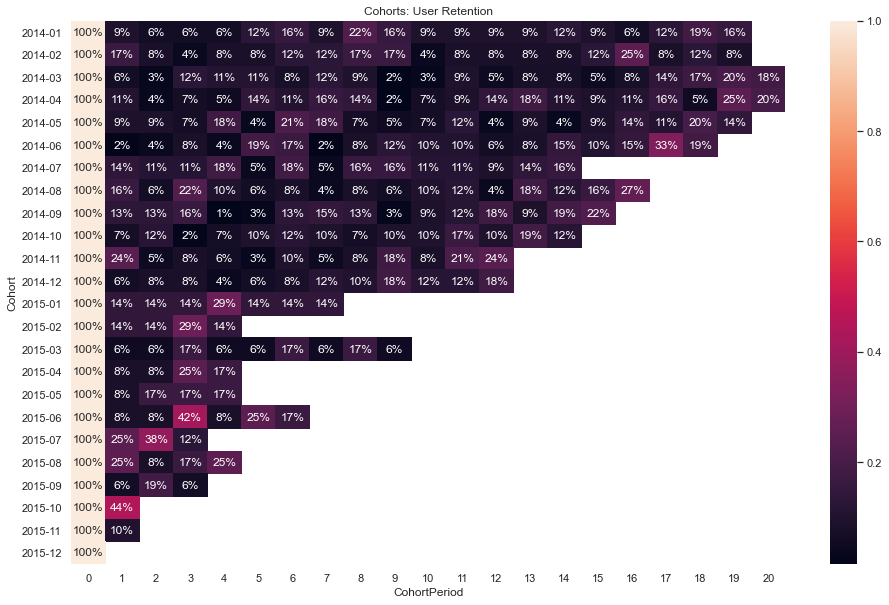

In [102]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')

In [104]:
df_merged_15_16 = df_merged[(df_merged['year_month']>='2015-01') & (df_merged['Cohort']>='2015-01') &
                           (df_merged['year_month']<'2017-01') & (df_merged['Cohort']<'2017-01')]
df_merged_15_16.head()

,id,order_date,ship_mode,customer_id,sales,year_month,Cohort
806,100146,2015-05-14,Standard,CB-12535,1452.7875,2015-05,2015-01
807,100216,2015-04-13,First,HJ-14875,85.9200,2015-04,2015-04
814,100734,2015-09-15,Standard,AC-10615,150.7600,2015-09,2015-09
822,101154,2015-09-18,First,CM-12190,443.9200,2015-09,2015-09
824,101868,2015-06-09,Standard,MJ-17740,175.3200,2015-06,2015-06


In [105]:
cohorts_group = df_merged_15_16.groupby(['Cohort', 'year_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Cohort,,,,,,,,,,,,,,,,,,,,,
2015-01,1.0,0.142857,0.142857,0.142857,0.285714,0.142857,0.142857,0.142857,0.142857,0.142857,...,0.142857,0.142857,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02,1.0,0.142857,0.142857,0.285714,0.142857,0.142857,0.285714,0.142857,0.142857,0.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03,1.0,0.055556,0.055556,0.166667,0.055556,0.055556,0.166667,0.055556,0.166667,0.055556,...,0.111111,0.055556,0.055556,0.166667,0.111111,0.111111,0.388889,0.166667,0.333333,0.277778
2015-04,1.0,0.083333,0.083333,0.250000,0.166667,0.083333,0.083333,0.083333,0.250000,0.083333,...,0.083333,0.166667,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05,1.0,0.083333,0.166667,0.166667,0.166667,0.083333,0.083333,0.250000,0.166667,0.083333,...,0.083333,0.250000,0.250000,0.166667,0.166667,0.083333,NaN,NaN,NaN,NaN
2015-06,1.0,0.083333,0.083333,0.416667,0.083333,0.250000,0.166667,0.083333,0.250000,0.083333,...,0.083333,0.166667,0.250000,0.250000,0.166667,NaN,NaN,NaN,NaN,NaN
2015-07,1.0,0.250000,0.375000,0.125000,0.250000,0.125000,0.125000,0.125000,0.250000,0.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08,1.0,0.250000,0.083333,0.166667,0.250000,0.083333,0.166667,0.333333,0.166667,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09,1.0,0.062500,0.187500,0.062500,0.250000,0.062500,0.187500,0.187500,0.062500,0.062500,...,0.187500,0.125000,0.187500,0.125000,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='Cohort'>

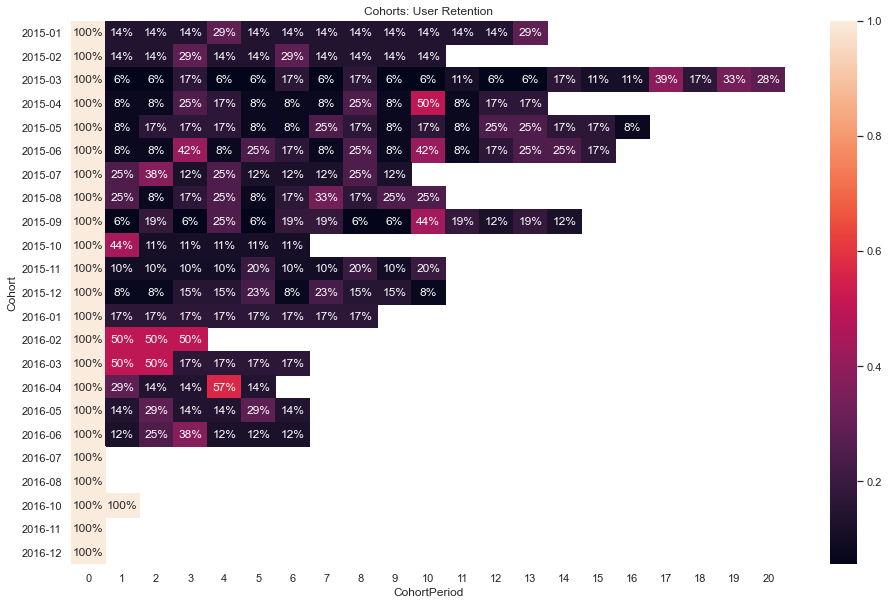

In [107]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')

In [108]:
df_merged_16_17 = df_merged[(df_merged['year_month']>='2016-01') & (df_merged['Cohort']>='2016-01')]
df_merged_16_17.head()

,id,order_date,ship_mode,customer_id,sales,year_month,Cohort
1700,100083,2016-11-24,Standard,CD-11980,24.784,2016-11,2016-11
1723,101525,2016-05-01,Second,CM-12235,140.520,2016-05,2016-05
1730,101742,2016-09-23,Second,CR-12580,10.528,2016-09,2016-04
1750,103128,2016-11-11,Standard,SC-20845,14.112,2016-11,2016-11
1754,103709,2016-09-08,Standard,LP-17095,310.860,2016-09,2016-06


In [109]:
cohorts_group = df_merged_16_17.groupby(['Cohort', 'year_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Cohort,,,,,,,,,,,,,,,,,,
2016-01,1.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.333333,0.333333,0.333333,0.333333,0.333333,0.166667,0.333333,NaN
2016-02,1.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03,1.0,0.500000,0.500000,0.166667,0.166667,0.166667,0.166667,0.500000,0.166667,0.166667,0.333333,0.333333,0.166667,0.166667,0.166667,0.166667,0.666667,0.333333
2016-04,1.0,0.285714,0.142857,0.142857,0.571429,0.142857,0.285714,0.142857,0.142857,0.285714,0.285714,0.142857,0.142857,0.285714,NaN,NaN,NaN,NaN
2016-05,1.0,0.142857,0.285714,0.142857,0.142857,0.285714,0.142857,0.285714,0.142857,0.285714,0.142857,0.142857,0.285714,0.285714,0.142857,0.285714,0.285714,NaN
2016-06,1.0,0.125000,0.250000,0.375000,0.125000,0.125000,0.125000,0.125000,0.250000,0.250000,0.250000,0.375000,0.125000,0.375000,NaN,NaN,NaN,NaN
2016-07,1.0,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08,1.0,0.250000,0.250000,0.500000,0.500000,0.250000,0.250000,0.500000,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='Cohort'>

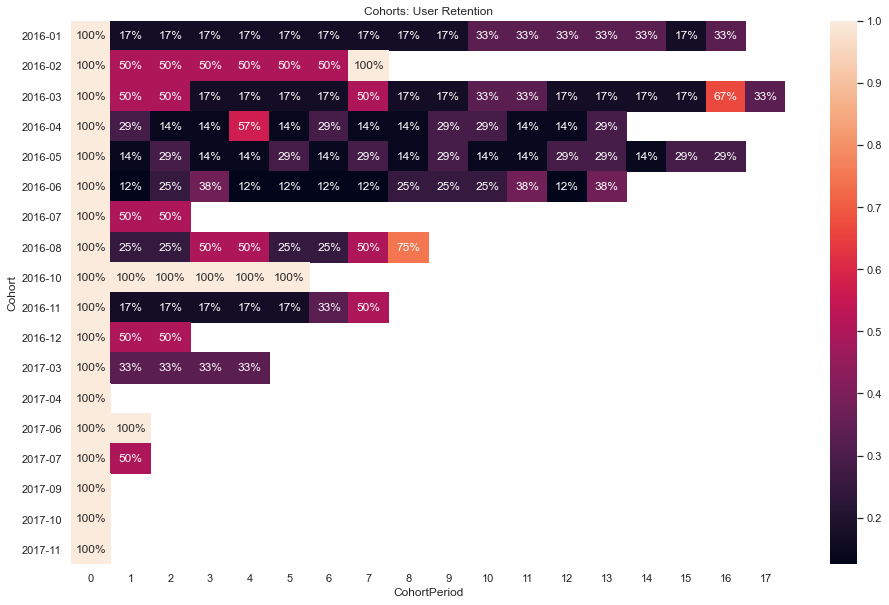

In [110]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')

Посмотрев retentaion rate за каждые 2 года (т.е. 14-15, 15-16, 16-17), видим, что после 15 года у нас есть много "белых клеток". Это происходит из-за того, у людей становится меньше покупок. 

Мне также видим, что retention rate в последние годы увеличивался. 

In [111]:
df_merged.groupby('year_month').agg({'customer_id': pd.Series.nunique})

,customer_id
year_month,
2014-01,32
2014-02,27
2014-03,69
2014-04,64
2014-05,67
2014-06,63
2014-07,65
2014-08,70
2014-09,118


Однако, также мы видим, что люди совершившие первую покупуку после марта 2017 года, более покупок не совершали. Однак из гипотез могла быть из проблем с данными, однако выше мы видим, что в 2017 году стали покупать больше, поэтому данный факт кажется странным. 

Таким образом, мне кажется в 2016 году был повышен retention rate, однако в 2017 данный показатель снизился, но покупать после февраля 2017 года стали больше. Поэтому, вероятно, была введен маркетинговый ход на "скидку на первую покупку". 

Однако, для полного анализа нужно также иметь данные 2018 года, так как мы видим, что к нам возвращаются с некоторым лагом. Так как при увеличение периода, retention rate увеличивается.  